In [2]:
!pip3 install -U ucimlrepo 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importa os treco, lembra de dar pip install -r requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
computer_hardware = fetch_ucirepo(id=29) 
  
# data (as pandas dataframes) 
X = computer_hardware.data.features 
y = computer_hardware.data.targets 
  
# metadata 
print(computer_hardware.metadata) 
  
# variable information 
print(computer_hardware.variables) 


{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

In [21]:
x = X[['MMAX']]
y = X[['PRP']]

# Mostra os 5 primeiros da lista td
df = pd.concat([x, y], axis=1)
df.head()

,MMAX,PRP
0,6000,198
1,32000,269
2,32000,220
3,32000,172
4,16000,132


In [20]:
df.describe()

,MMAX,PRP
count,209.000000,209.000000
mean,11796.153110,105.622010
std,11726.564377,160.830733
min,64.000000,6.000000
25%,4000.000000,27.000000
50%,8000.000000,50.000000
75%,16000.000000,113.000000
max,64000.000000,1150.000000


In [23]:
x = 'MMAX'
y = 'PRP'
data_y = df[y]
data_x = df[x]
data = df[[x, y]].copy()
print(data)

      MMAX  PRP
0     6000  198
1    32000  269
2    32000  220
3    32000  172
4    16000  132
..     ...  ...
204   8000   42
205   8000   46
206   8000   52
207   8000   67
208   4000   45

[209 rows x 2 columns]


In [24]:
n_iterations = 9000 # bootstrap
alpha = 0.05 #nivel significancia
num_particoes = 5

nomes = []
limites_inferiores = []
limites_superiores = []

#Subconjuntos categoria
df['y_cat'] = pd.qcut(df[y], num_particoes, duplicates='drop')
# intervalo de confiança para X
for nome, subconjunto in df.groupby('y_cat'):
    values = subconjunto[x]
    means = []
    for _ in range(n_iterations):
        sample = resample(values)
        means.append(sample.mean())
    lower = np.percentile(means, (alpha/2)*100)
    upper = np.percentile(means, (1-alpha/2)*100)

    nomes.append(str(nome))
    limites_inferiores.append(lower)
    limites_superiores.append(upper)

    print(f'Subconjunto {nome}: Intervalo de confiança (95%) para {x} é ({lower:.3f}, {upper:.3f})')

C:\Users\Eagle\AppData\Local\Temp\ipykernel_9412\4138080602.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for nome, subconjunto in df.groupby('y_cat'):


Subconjunto (5.999, 24.0]: Intervalo de confiança (95%) para MMAX é (2869.136, 4311.111)
Subconjunto (24.0, 38.0]: Intervalo de confiança (95%) para MMAX é (4249.951, 6197.602)
Subconjunto (38.0, 62.8]: Intervalo de confiança (95%) para MMAX é (7753.718, 10320.513)
Subconjunto (62.8, 138.0]: Intervalo de confiança (95%) para MMAX é (11429.750, 14980.843)
Subconjunto (138.0, 1150.0]: Intervalo de confiança (95%) para MMAX é (24338.049, 33365.982)


In [25]:
# Criar um DataFrame para os resultados
resultados = pd.DataFrame({
    'Subconjunto': nomes,
    'Limite Inferior': limites_inferiores,
    'Limite Superior': limites_superiores
})

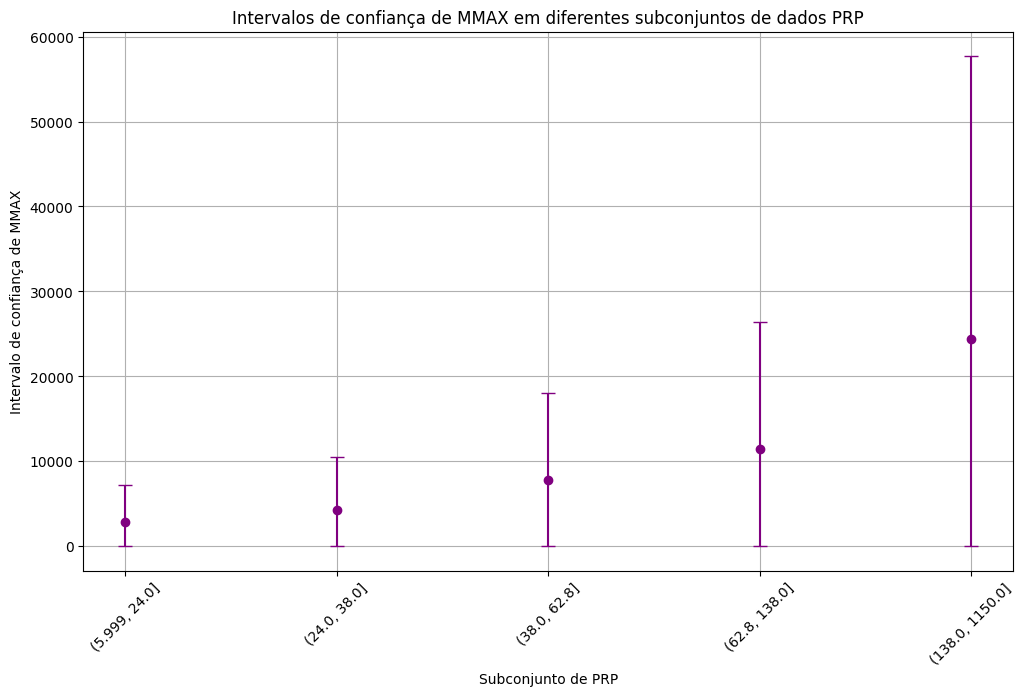

In [26]:
# Plotar os intervalos de confiança
plt.figure(figsize=(12, 7))
plt.errorbar(resultados['Subconjunto'], resultados['Limite Inferior'], yerr=[resultados['Limite Inferior'], resultados['Limite Superior']], fmt='o', capsize=5, color='purple')
plt.xlabel(f'Subconjunto de {y}')
plt.ylabel(f'Intervalo de confiança de {x}')
plt.title(f'Intervalos de confiança de {x} em diferentes subconjuntos de dados {y}')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

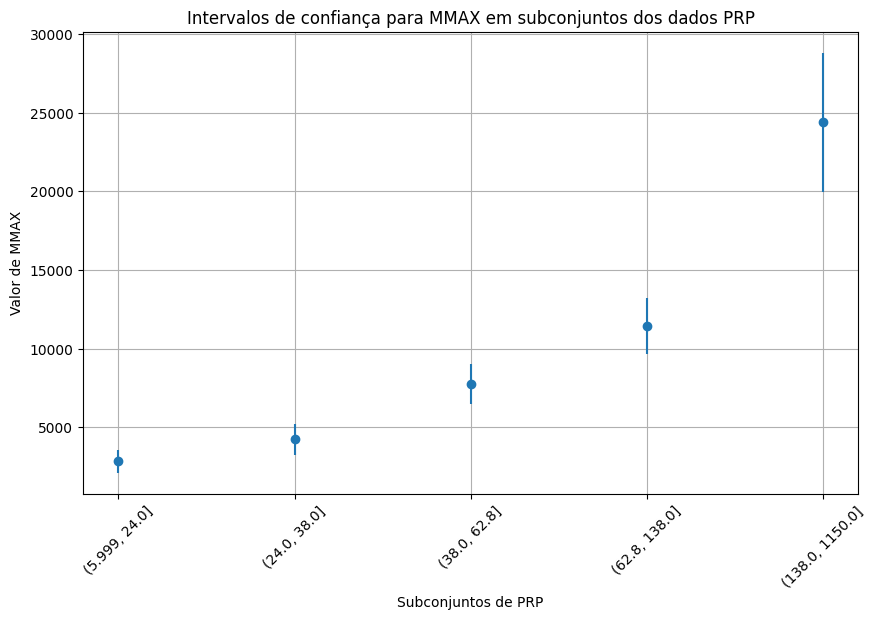

In [10]:
# Gráfico rascunho
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(nomes)), limites_inferiores, yerr=(np.array(limites_superiores) - np.array(limites_inferiores)) / 2, fmt = 'o')
plt.ylabel('Valor de ' + x)
plt.xlabel('Subconjuntos de ' + y)
plt.title('Intervalos de confiança para ' + x + ' em subconjuntos dos dados ' + y)
plt.xticks(np.arange(len(nomes)), nomes, rotation = 45)
plt.grid(True)
plt.show()